# Stock Market Dataset Modeling Based on the ARIMA Model 

### Import the libraries:

In [29]:
#Import the libraries:
import pandas as pd
import datetime as dt
from datetime import timedelta, date
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [30]:
#Date time:
date.today()

datetime.date(2024, 8, 19)

# Scrapping of Stock Market Dataset

**Check the Time Series of Dataset**

In [31]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
d1

#Make the d2 with timedelta of 365 periods:
d2 = (today - timedelta(days=365)).strftime("%Y-%m-%d")
d2

start_date = d2
end_date = d1

print("Your data will be between these dates:", end_date, start_date)

Your data will be between these dates: 2024-08-19 2023-08-20


In [43]:
#Define the ticker:
#Define the ticker keys words:
ticker = "GOOGL"
df = yf.download(ticker, start = start_date, end = end_date, progress=False)
df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-21,127.180000,128.729996,126.559998,128.369995,128.222839,25248700
2023-08-22,128.509995,130.279999,128.320007,129.080002,128.932022,22067500
2023-08-23,130.179993,133.410004,129.869995,132.369995,132.218246,27819700
2023-08-24,133.949997,134.250000,129.570007,129.779999,129.631226,28500700
2023-08-25,129.539993,130.759995,127.250000,129.880005,129.731110,26762900


In [44]:
#Dataset columns:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [45]:
#Reset the columns:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
#Insert the the date column in firt:
#df.insert(0, 'Date', df.index, True)

In [46]:
df = df[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [47]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
#Head of dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-21,127.180000,128.729996,126.559998,128.369995,128.222839,25248700
1,2023-08-22,128.509995,130.279999,128.320007,129.080002,128.932022,22067500
2,2023-08-23,130.179993,133.410004,129.869995,132.369995,132.218246,27819700
3,2023-08-24,133.949997,134.250000,129.570007,129.779999,129.631226,28500700
4,2023-08-25,129.539993,130.759995,127.250000,129.880005,129.731110,26762900


In [49]:
#Describe the dataset:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2024-02-17 10:45:07.200000,150.237200,151.823160,148.893400,150.430000,150.296198,2.808951e+07
min,2023-08-21 00:00:00,122.879997,123.309998,120.209999,122.169998,122.029945,1.024210e+07
25%,2023-11-16 06:00:00,136.012497,137.302502,134.734997,136.189999,136.033878,2.154648e+07
50%,2024-02-18 00:00:00,143.315002,144.514999,141.905006,143.290001,143.125740,2.528220e+07
75%,2024-05-16 18:00:00,166.972496,168.130001,164.044998,166.915001,166.915001,3.104678e+07
max,2024-08-16 00:00:00,190.309998,191.750000,189.029999,191.179993,191.179993,8.436620e+07
std,NaN,18.047924,18.206909,17.905133,18.026265,18.060934,1.067598e+07


In [50]:
#Time Series and Dataset correlation: 
fig = px.line(df, x="Date", y=df.columns, title="Stock Market Trend")
fig.show()

In [51]:
#Select the Date and Close column:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-08-21,128.369995
1,2023-08-22,129.080002
2,2023-08-23,132.369995
3,2023-08-24,129.779999
4,2023-08-25,129.880005


In [52]:
#Plot the Date and Close:
fig = px.line(df, x="Date", y="Close", title="Google dataset Plotting")
fig.show()

In [53]:
#Check the stationarity of dataset:
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis, the series is stationary")
    else:
        print("Fail to reject the null hypothesis, the series is non-stationary")
check_stationarity(df['Close'])        

ADF Statistic: -1.382542
p-value: 0.590616
Fail to reject the null hypothesis, the series is non-stationary


## Seasonal Decomposition of Dataset

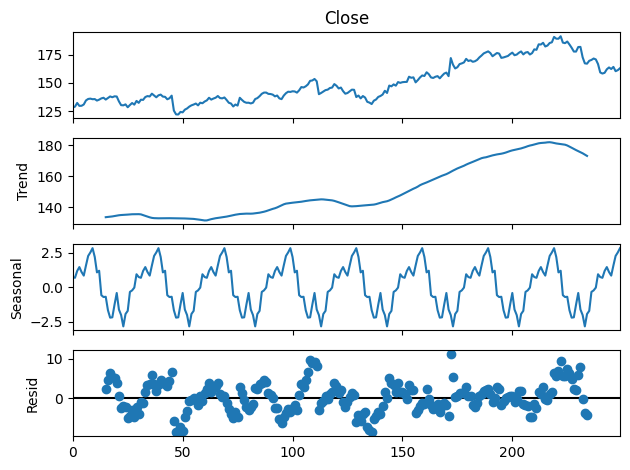

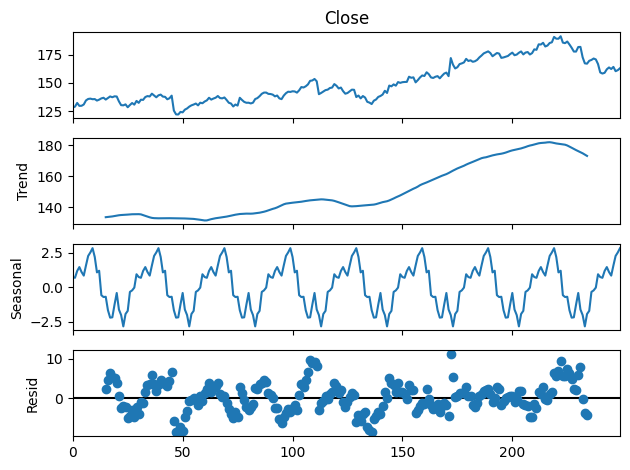

In [54]:
#Now its compose the close dataset:
decompse = seasonal_decompose(df['Close'], model='addative', period=30)
decompse.plot()


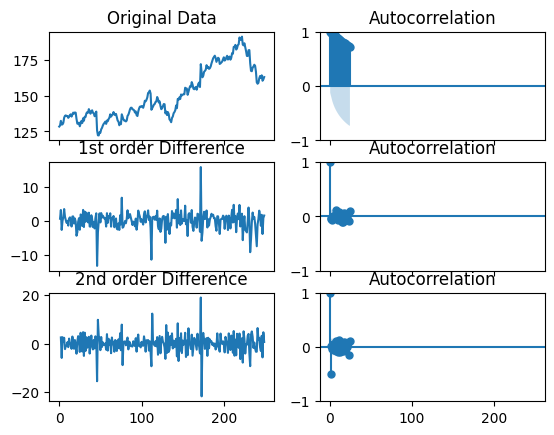

In [56]:
#Now plot the acf with original dataset:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df["Close"]); axes[0, 0].set_title('Original Data')
plot_acf(df["Close"], ax=axes[0, 1])
#Plot the 1difference:
axes[1,0].plot(df["Close"].diff()); axes[1, 0].set_title("1st order Difference")
plot_acf(df["Close"].diff().dropna(), ax=axes[1, 1])
#2nd Difference:
axes[2,0].plot(df["Close"].diff().diff()); axes[2, 0].set_title("2nd order Difference")
plot_acf(df["Close"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


`d = 1`,
`p = 4 `,
`q = 2`

## Let's Find the values of p, q and d:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

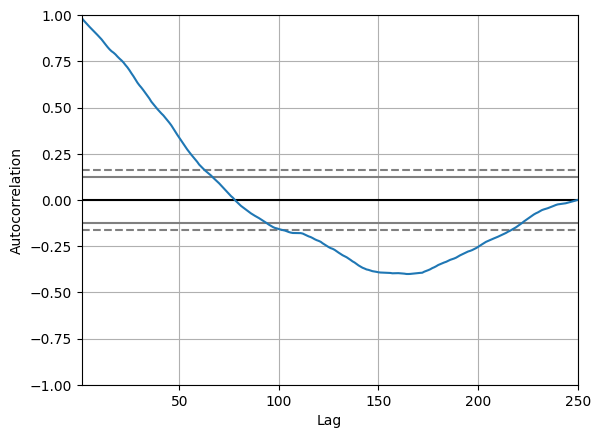

In [57]:
#Check the correlation of dataset:
pd.plotting.autocorrelation_plot(df['Close'])

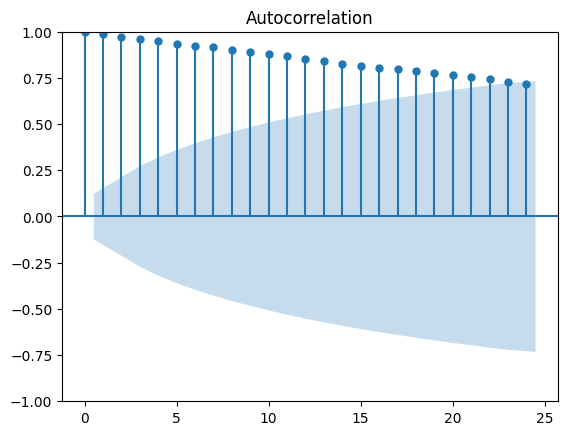

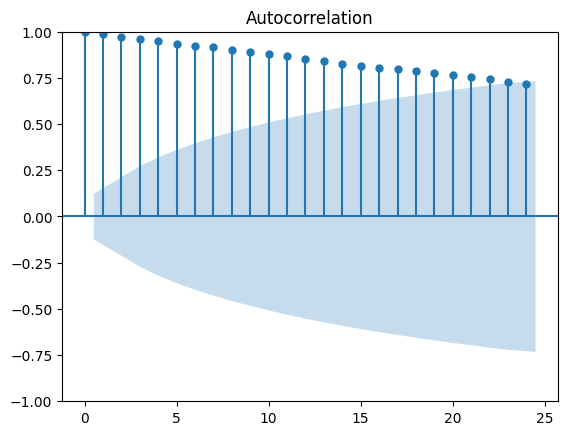

In [58]:
#Apply the ACF:
plot_acf(df["Close"], alpha=0.05)

## Find the Correlation in the dataset, using ACF and PACF

In [61]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.985140
2   0.971409
3   0.959582
4   0.947723
5   0.936024
6   0.925158
7   0.915048
8   0.903191
9   0.891887
10  0.880216
11  0.868676
12  0.854354
13  0.840848
14  0.827271
15  0.815012
16  0.804682
17  0.796864
18  0.787268
19  0.775434
20  0.764719
21  0.755015
22  0.743687
23  0.729834


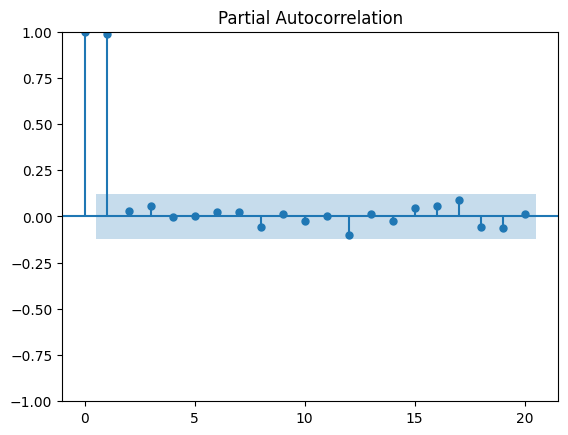

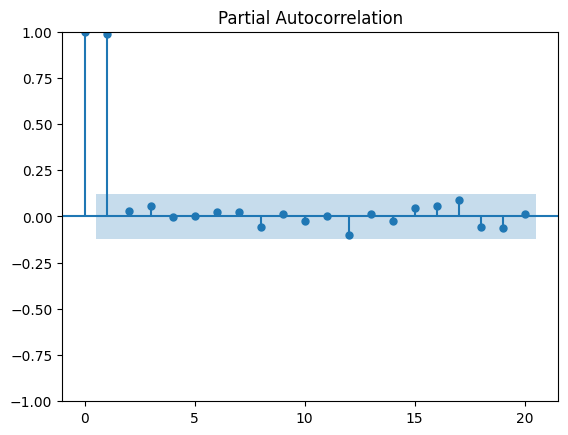

In [62]:
#Find the value of q:
plot_pacf(df['Close'], lags=20, alpha=0.05)

**Values of ARIMA Model Hyper Parameters**
1. p = 4
2. d = 1
3. q = 2

# Apply the Auto ARIMA Model on the dataset

In [63]:
#Define the values of p, q, d
p = 4
d = 1
q = 2

In [64]:
#Import the auto pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df["Close"], start_p=4, start_q=2, max_p=7, max_q=7, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(4,1,2)(0,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1312.177, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1221.736, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1311.985, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1217.130, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1215.923, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1220.705, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.40 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1217.055, Time=1.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1218.260, Time=1.65 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1217.6

In [65]:
#Print the summary of Model:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  250
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -604.961
Date:                            Mon, 19 Aug 2024   AIC                           1215.923
Time:                                    10:31:11   BIC                           1226.327
Sample:                                         0   HQIC                          1220.116
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6758      0.053    -12.737      0.000      -0.780      -0.572
ar.S.L24      -0.1730      0.052   

# Apply the ARIMA Model on dataset

In [66]:
#Import the ARIMA Model:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 4, 1, 2
#Build the ARIMA Model
model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
#Print the summary of the model
print(model.summary())


c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -596.034
Date:                Mon, 19 Aug 2024   AIC                           1206.068
Time:                        10:37:08   BIC                           1230.690
Sample:                             0   HQIC                          1215.979
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0656     11.557     -0.006      0.995     -22.717      22.586
ar.L2          0.0806      1.561      0.052      0.959      -2.979       3.140
ar.L3         -0.0600      0.518     -0.116      0.9

In [72]:
#Predict the forecast values in ARIMA Model:
#Predict next 30 days:
forecast = model.predict(len(df['Close']), len(df['Close'])+30)
print(forecast)

250    163.117332
251    162.951236
252    162.881738
253    162.875103
254    162.881005
255    162.883089
256    162.883339
257    162.883090
258    162.883043
259    162.883026
260    162.883040
261    162.883039
262    162.883041
263    162.883039
264    162.883040
265    162.883040
266    162.883040
267    162.883040
268    162.883040
269    162.883040
270    162.883040
271    162.883040
272    162.883040
273    162.883040
274    162.883040
275    162.883040
276    162.883040
277    162.883040
278    162.883040
279    162.883040
280    162.883040
Name: predicted_mean, dtype: float64


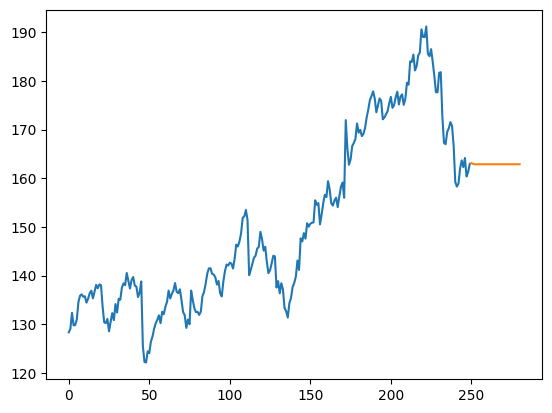

In [73]:
#Plot the Forecast and Actual values in ARIMA Model:
plt.plot(df['Close'], label="Actual")
plt.plot(forecast, label="forecast")


# Apply the SARIMAX Model on Dataset:

In [74]:
#Lets Run the SARIMA Model:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Import warnings:
import warnings
warnings.filterwarnings("ignore")

#Apply the paramaters:
p, d, q = 4, 1, 2
order = (p, d, q)
#Fit the model
model = SARIMAX(df['Close'], order=order, seasonal_order=(p,q,d, 12))
model_fit = model.fit(disp=False)
# summarize fit
print(model_fit.summary())



                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  250
Model:             SARIMAX(4, 1, 2)x(4, 2, [1], 12)   Log Likelihood                -598.097
Date:                              Mon, 19 Aug 2024   AIC                           1220.194
Time:                                      10:55:30   BIC                           1261.187
Sample:                                           0   HQIC                          1236.739
                                              - 250                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3532      0.074    -18.194      0.000      -1.499      -1.207
ar.L2         -1.07

In [80]:
#Let's predict the model:
predictions = model_fit.predict(start=len(df['Close']), end=len(df['Close'])+30)
print(predictions)

250    162.264665
251    158.622500
252    155.014486
253    154.582128
254    155.993047
255    157.883395
256    153.515498
257    150.140504
258    152.021830
259    151.099465
260    152.640971
261    154.401025
262    153.535099
263    150.294721
264    145.852385
265    144.574251
266    146.168326
267    149.231335
268    147.145646
269    145.876325
270    147.560192
271    144.212103
272    146.267504
273    147.402250
274    146.910285
275    143.667652
276    138.885855
277    138.894244
278    140.720302
279    142.843645
280    139.023430
Name: predicted_mean, dtype: float64


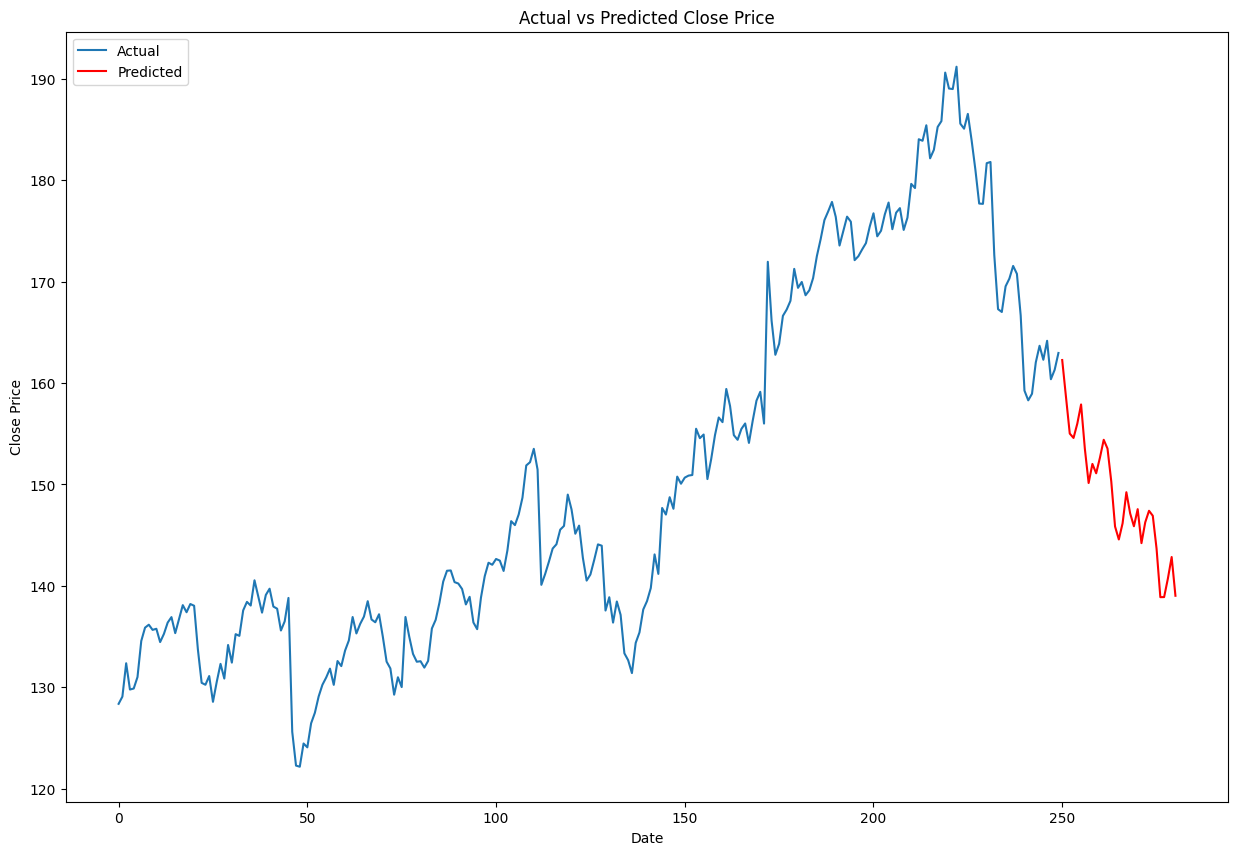

In [82]:
#Plot the SARIMAX value Graph:
plt.figure(figsize=(15, 10))
plt.plot(df['Close'], label="Actual")
plt.plot(predictions, label="Predicted", color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend(loc='upper left')
plt.show()
